In [6]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the Excel File and check the result

df = pd.read_excel("5.4-PigEBank-Client-Data set.xlsx")

df.head()

,Row_Number,Customer_ID,Last_Name,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


## Data Quality Assessment

In [9]:
# Check for Missing Values

print(df.isnull().sum())  # Count missing values in each column

Row_Number          0
Customer_ID         0
Last_Name           1
Credit Score        3
Country             0
Gender              1
Age                 1
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard?          0
IsActiveMember      0
Estimated Salary    2
ExitedFromBank?     0
dtype: int64


In [10]:
# Check Unique Values in Key Columns

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Row_Number: 991 unique values
Customer_ID: 991 unique values
Last_Name: 734 unique values
Credit Score: 354 unique values
Country: 6 unique values
Gender: 4 unique values
Age: 61 unique values
Tenure: 11 unique values
Balance: 643 unique values
NumOfProducts: 4 unique values
HasCrCard?: 2 unique values
IsActiveMember: 2 unique values
Estimated Salary: 989 unique values
ExitedFromBank?: 2 unique values


In [11]:
# Identify Outliers and Data Issues

print(df.describe())  # Summary statistics for each column

       Row_Number   Customer_ID  Credit Score         Age      Tenure  \
count   991.00000  9.910000e+02    988.000000  990.000000  991.000000   
mean    496.00000  1.569232e+07    648.512146   38.684848    5.066599   
std     286.22136  7.223333e+04     98.202853   10.958220    2.928371   
min       1.00000  1.556609e+07    376.000000    2.000000    0.000000   
25%     248.50000  1.563019e+07    579.750000   32.000000    2.000000   
50%     496.00000  1.569275e+07    653.500000   37.000000    5.000000   
75%     743.50000  1.575379e+07    721.000000   44.000000    8.000000   
max     991.00000  1.581536e+07    850.000000   82.000000   10.000000   

             Balance  NumOfProducts  HasCrCard?  IsActiveMember  \
count     991.000000     991.000000  991.000000      991.000000   
mean    78002.718063       1.522704    0.706357        0.507568   
std     62799.237345       0.573170    0.455660        0.500195   
min         0.000000       1.000000    0.000000        0.000000   
25%    

## Statistical Analysis - Identifying Key Churn Factors

In [13]:
# Separate Customers into Two Groups

df_left = df[df["ExitedFromBank?"] == 1]  # Customers who left
df_stayed = df[df["ExitedFromBank?"] == 0]  # Customers who stayed

In [14]:
# Compute Average Values

cols_to_check = ["Age", "Credit Score", "Estimated Salary", "Balance", "NumOfProducts"]

for col in cols_to_check:
    print(f"{col}: Average for stayed customers: {df_stayed[col].mean():.2f}, for exited customers: {df_left[col].mean():.2f}")

Age: Average for stayed customers: 37.04, for exited customers: 45.06
Credit Score: Average for stayed customers: 651.62, for exited customers: 636.51
Estimated Salary: Average for stayed customers: 98943.39, for exited customers: 97155.20
Balance: Average for stayed customers: 74830.87, for exited customers: 90239.22
NumOfProducts: Average for stayed customers: 1.54, for exited customers: 1.46


## Data Visualization

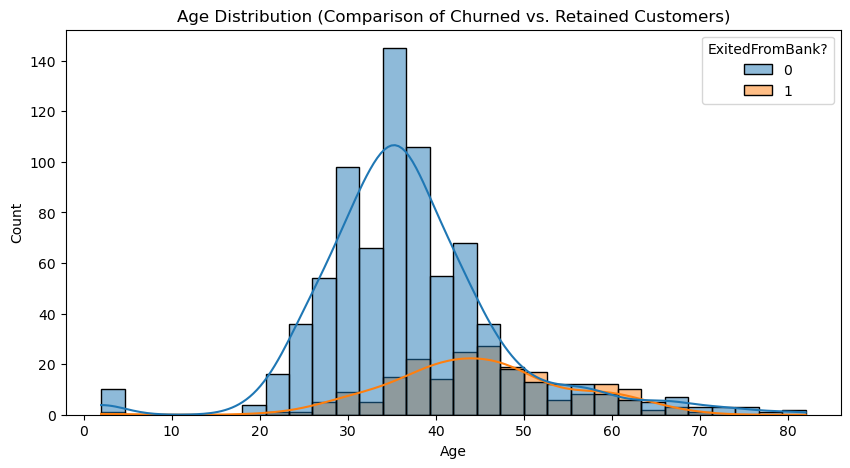

In [16]:
# Age Distribution

plt.figure(figsize=(10, 5))
sns.histplot(df, x="Age", hue="ExitedFromBank?", kde=True, bins=30)
plt.title("Age Distribution (Comparison of Churned vs. Retained Customers)")
plt.show()

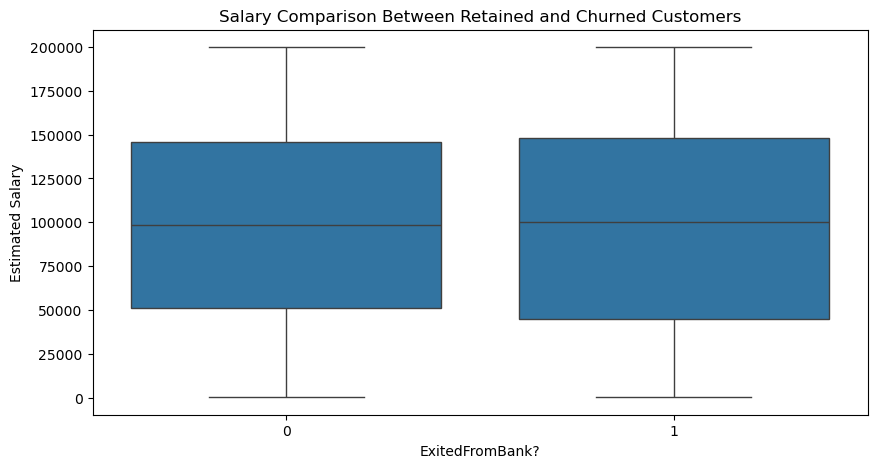

In [17]:
# Salary vs. Churn (Boxplot)

plt.figure(figsize=(10, 5))
sns.boxplot(x="ExitedFromBank?", y="Estimated Salary", data=df)
plt.title("Salary Comparison Between Retained and Churned Customers")
plt.show()


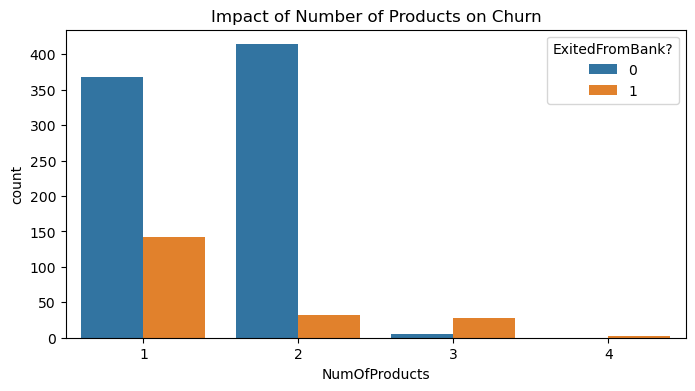

In [18]:
# Impact of Number of Products on Churn

plt.figure(figsize=(8, 4))
sns.countplot(x="NumOfProducts", hue="ExitedFromBank?", data=df)
plt.title("Impact of Number of Products on Churn")
plt.show()

## Building a Decision Tree

In [20]:
# Prepare Data for the Model

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Selecting features for the model
features = ["Age", "Credit Score", "Estimated Salary", "Balance", "NumOfProducts"]
X = df[features]
y = df["ExitedFromBank?"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train the Decision Tree

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

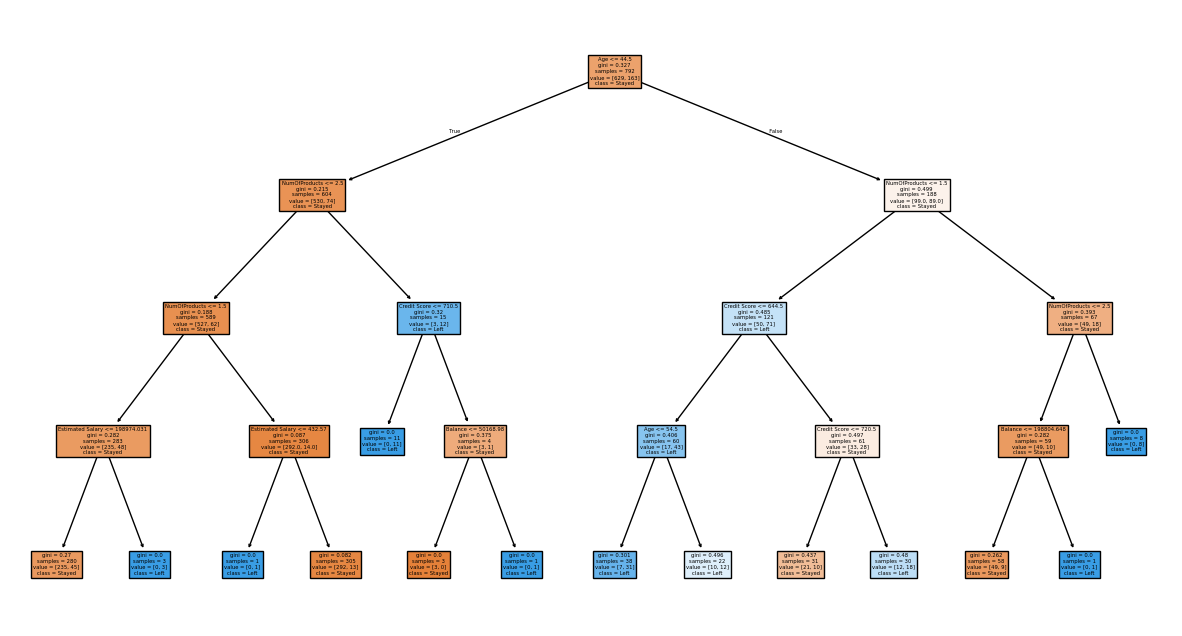

In [22]:
# Visualize the Decision Tree

plt.figure(figsize=(15, 8))
tree.plot_tree(model, feature_names=features, class_names=["Stayed", "Left"], filled=True)
plt.show()

In [43]:
# Check for Unique Values in the "Country" Column

print(df["Country"].unique())

['France' 'Spain' 'Germany' 'FR' 'ES' 'DE']


In [47]:
# Convert All to Full Country Names

country_mapping = {
    "DE": "Germany",
    "ES": "Spain",
    "FR": "France"
}

df["Country"] = df["Country"].replace(country_mapping)


In [93]:
# Count the Occurrences

print(df["Country"].value_counts())

Country
FR         244
France     236
Germany    234
Spain      136
ES         118
DE          23
Name: count, dtype: int64


In [53]:
# Check for Missing Values in Estimated Salary

print(df["Estimated Salary"].isnull().sum())  # Count missing values
df["Estimated Salary"].fillna(df["Estimated Salary"].median(), inplace=True)  # Fill with median if missing

2


C:\Users\zwier\AppData\Local\Temp\ipykernel_16072\3853395694.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Estimated Salary"].fillna(df["Estimated Salary"].median(), inplace=True)  # Fill with median if missing


In [55]:
print(df["estimatedsalary"].isnull().sum())  # Count missing values
df["estimatedsalary"].fillna(df["estimatedsalary"].median(), inplace=True)  # Fill with median if missing


KeyError: 'estimatedsalary'

In [57]:
df["Estimated Salary"].fillna(df["Estimated Salary"].median(), inplace=True)

C:\Users\zwier\AppData\Local\Temp\ipykernel_16072\1293628770.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Estimated Salary"].fillna(df["Estimated Salary"].median(), inplace=True)


In [65]:
df['Last_Name'].value_counts()


Last_Name
Shih         6
Tsao         6
He           6
Martin       5
Li           4
            ..
Amos         1
Reed         1
West         1
Madukaego    1
Hsing        1
Name: count, Length: 734, dtype: int64

In [71]:
df.columns = df.columns.str.strip()
value_counts_dict = {col: df[col].value_counts(dropna=False) for col in df.columns}
value_counts_df = pd.DataFrame({col: value_counts_dict[col] for col in df.columns})
print(value_counts_df)

TypeError: '<' not supported between instances of 'str' and 'int'

In [73]:
import pandas as pd

# Load the dataset (update the file path if needed)
file_path = "5.4-PigEBank-Client-Data set.xlsx"
df = pd.read_excel(file_path)

# Strip column names to remove leading/trailing spaces (if any)
df.columns = df.columns.str.strip()

# Compute value counts for all columns and convert results to strings
value_counts_dict = {col: df[col].value_counts(dropna=False).astype(str) for col in df.columns}

# Convert the dictionary to a DataFrame (ensuring uniform index length)
value_counts_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in value_counts_dict.items()]))

# Display the results
print(value_counts_df)

# Optionally, save the results to an Excel file
value_counts_df.to_excel("value_counts_output.xlsx", index=True)


TypeError: '<' not supported between instances of 'str' and 'int'

In [75]:
# Standardize Gender values
gender_mapping = {
    "F": "Female",
    "M": "Male",
    "NULL": None  # Convert "NULL" to actual missing values
}

df["Gender"] = df["Gender"].replace(gender_mapping)


In [77]:
print(df["Gender"].value_counts(dropna=False))


Gender
Male      528
Female    462
NaN         1
Name: count, dtype: int64


In [83]:
# dropping the na

df_cleaned = df.dropna()
df_cleaned = df.dropna(subset=["Last_Name", "Credit Score", "Age", "Estimated Salary", "Gender"])
print(df_cleaned.isnull().sum())  # Should return 0 for all columns


Row_Number          0
Customer_ID         0
Last_Name           0
Credit Score        0
Country             0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard?          0
IsActiveMember      0
Estimated Salary    0
ExitedFromBank?     0
dtype: int64


In [89]:
print(df_cleaned["Gender"].value_counts(dropna=False))

Gender
Male      525
Female    459
Name: count, dtype: int64


In [123]:
df_cleaned.to_excel("cleaned_dataset.xlsx", index=False)

In [115]:
print(df_cleaned["Country"].value_counts())

Country
France     479
Germany    255
Spain      250
Name: count, dtype: int64


In [117]:
print(df_cleaned["Country"].unique())

['France' 'Spain' 'Germany']


In [119]:
# Convert All to Full Country Names

country_mapping = {
    "DE": "Germany",
    "ES": "Spain",
    "FR": "France"
}

df_cleaned["Country"] = df_cleaned["Country"].replace(country_mapping)


C:\Users\zwier\AppData\Local\Temp\ipykernel_16072\364593110.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Country"] = df_cleaned["Country"].replace(country_mapping)


In [121]:
print(df_cleaned["Country"].value_counts())

Country
France     479
Germany    255
Spain      250
Name: count, dtype: int64


In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_excel("cleaned_dataset.xlsx")

# Selecting relevant features
features = ["IsActiveMember", "NumOfProducts", "Credit Score", "Age"]
X = df[features]
y = df["ExitedFromBank?"]  # Target variable (1 = left, 0 = stayed)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


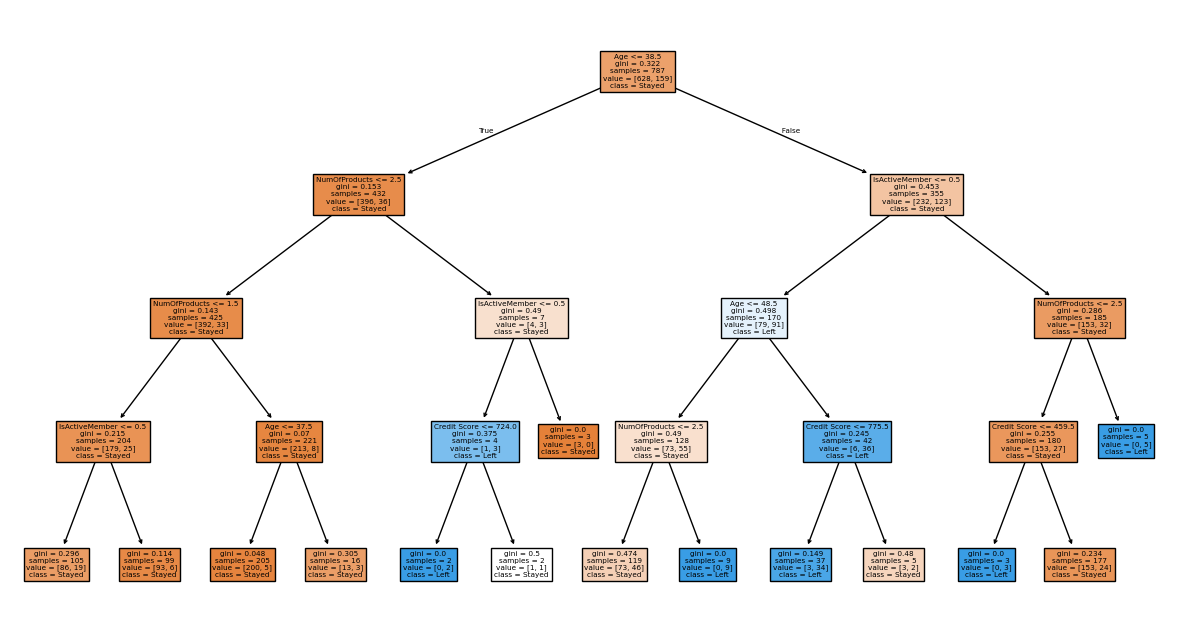

In [131]:
# Create Decision Tree Model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=features, class_names=["Stayed", "Left"], filled=True)
plt.show()
